In [19]:
import pandas as pd
import numpy as np
import nltk
import itertools
import pathlib
from tqdm import tqdm
import time
from matplotlib import pyplot as plt
from random import randint
import cv2

In [20]:
cd /Users/sayako/ocha/study/localized-narratives-master

[Errno 2] No such file or directory: '/Users/sayako/ocha/study/localized-narratives-master'
/Users/sayako/MEGAsync/koba_ken/study/LaBERT-master


In [21]:
#データ読み込み
df = pd.read_json('./trace_localized_narattives/coco_val_localized_narratives.jsonl', orient='records', lines=True)

In [22]:
#index確認
print(np.array(df.columns))  

['dataset_id' 'image_id' 'annotator_id' 'caption' 'timed_caption' 'traces'
 'voice_recording']


In [23]:
#COCO_val2014_000000261161

In [24]:
data_num = 34139

In [25]:
for i in range(len(df['image_id'])):
    if(df['image_id'][i] == data_num):
        print(i)
        id_ = i
        print(df[i:i+1].values.tolist()[0][0])
        print(df[i:i+1].values.tolist()[0][1])
        print(df[i:i+1].values.tolist()[0][2])
        print(df[i:i+1].values.tolist()[0][3])

204
mscoco_val2017
34139
25
I can see in this image a bag of a brown color. I can also see two man among them a woman and a man is standing on the ground. The woman is holding a bag in her hand. In the background I can see a building and a statue.
2782
mscoco_val2017
34139
61
Top right side of the image there are two persons standing and smiling behind them there is a glass door. Bottom left side of the image there is a suitcase statue. Behind the statue there is a building.
3045
mscoco_val2017
34139
107
In this image, in the left side there is a big brown color bag, in the right side there are some people standing, in the background there is a shop in black color, and fidelity is written on the shop.
5034
mscoco_val2017
34139
37
This picture shows a briefcase and we see a handle and few stickers on it we see a man and woman standing on the side and we see both of them wore a spectacles on their faces and we see a statue on their back and a store in the building
7655
mscoco_val2017
341

In [33]:
id_ = 204

In [34]:
#データ選択
data_1 = df[id_:id_+1].values.tolist()

In [35]:
#データ確認
data_1[0]

['mscoco_val2017',
 34139,
 25,
 'I can see in this image a bag of a brown color. I can also see two man among them a woman and a man is standing on the ground. The woman is holding a bag in her hand. In the background I can see a building and a statue.',
 [{'utterance': 'I', 'start_time': 0.0, 'end_time': 0.6000000000000001},
  {'utterance': 'can', 'start_time': 0.6000000000000001, 'end_time': 0.9},
  {'utterance': 'see', 'start_time': 0.9, 'end_time': 1.1},
  {'utterance': 'in', 'start_time': 1.1, 'end_time': 1.3},
  {'utterance': 'this', 'start_time': 1.3, 'end_time': 1.5},
  {'utterance': 'image', 'start_time': 1.5, 'end_time': 2.0},
  {'utterance': 'a bag', 'start_time': 2.0, 'end_time': 5.0},
  {'utterance': 'of', 'start_time': 5.0, 'end_time': 5.8},
  {'utterance': 'a', 'start_time': 5.8, 'end_time': 5.9},
  {'utterance': 'brown', 'start_time': 5.9, 'end_time': 6.4},
  {'utterance': 'color.', 'start_time': 6.4, 'end_time': 6.8},
  {'utterance': 'I', 'start_time': 6.8, 'end_time'

In [36]:
#ファイル名
name = str(data_1[0][1])
name_id = name + "__" + str(id_)

In [37]:
#print("キャプション")
data_1[0][3]

'I can see in this image a bag of a brown color. I can also see two man among them a woman and a man is standing on the ground. The woman is holding a bag in her hand. In the background I can see a building and a statue.'

In [38]:
#単語の始まりと終わりの秒数
print("キャプション - 時間")
caption = data_1[0][4]

caption_list_list = []

for i in range(len(caption)):
    caption_list = []
    caption_list.append(caption[i]["utterance"])
    caption_list.append(caption[i]["start_time"])
    caption_list.append(caption[i]["end_time"])
    caption_list_list.append(caption_list)
caption_list_list

キャプション - 時間


[['I', 0.0, 0.6000000000000001],
 ['can', 0.6000000000000001, 0.9],
 ['see', 0.9, 1.1],
 ['in', 1.1, 1.3],
 ['this', 1.3, 1.5],
 ['image', 1.5, 2.0],
 ['a bag', 2.0, 5.0],
 ['of', 5.0, 5.8],
 ['a', 5.8, 5.9],
 ['brown', 5.9, 6.4],
 ['color.', 6.4, 6.8],
 ['I', 6.8, 12.5],
 ['can', 12.5, 12.7],
 ['also', 12.7, 12.9],
 ['see', 12.9, 13.2],
 ['two', 13.2, 15.2],
 ['man', 15.2, 16.5],
 ['among', 16.5, 17.6],
 ['them', 17.6, 17.9],
 ['a', 17.9, 19.1],
 ['woman', 19.1, 19.5],
 ['and', 19.5, 19.7],
 ['a', 19.7, 19.8],
 ['man', 19.8, 20.1],
 ['is', 20.1, 20.5],
 ['standing', 20.5, 20.5],
 ['on', 20.5, 22.2],
 ['the', 22.2, 22.4],
 ['ground.', 22.4, 22.5],
 ['The', 22.5, 24.4],
 ['woman', 24.4, 24.8],
 ['is', 24.8, 25.1],
 ['holding', 25.1, 25.4],
 ['a', 25.4, 25.9],
 ['bag', 25.9, 26.3],
 ['in', 26.3, 26.4],
 ['her', 26.4, 26.6],
 ['hand.', 26.6, 26.7],
 ['In', 26.7, 29.6],
 ['the', 29.6, 29.7],
 ['background', 29.7, 30.0],
 ['I', 30.0, 30.2],
 ['can', 30.2, 30.4],
 ['see', 30.4, 30.6],
 ['a',

In [39]:
trace = []
for i in range(len(data_1[0][5])):
    trace.extend(data_1[0][5][i])

In [40]:
#何秒にマウスがどこの位置にいるか
print("マウス位置 - 時間")
#trace = data_1[0][5][0]

trace_list_list = []

for i in range(len(trace)):
    trace_list = []
    trace_list.append(trace[i]["x"])
    trace_list.append(trace[i]["y"])
    trace_list.append(trace[i]["t"])
    trace_list_list.append(trace_list)
trace_list_list

マウス位置 - 時間


[[0.1961, 0.0475, 0.017],
 [0.26280000000000003, 0.1306, 0.03],
 [0.3054, 0.2107, 0.047],
 [0.3295, 0.2821, 0.064],
 [0.34040000000000004, 0.3433, 0.08],
 [0.3415, 0.4118, 0.096],
 [0.3415, 0.43660000000000004, 0.113],
 [0.3361, 0.457, 0.131],
 [0.3306, 0.4672, 0.147],
 [0.3251, 0.47450000000000003, 0.163],
 [0.3196, 0.48760000000000003, 0.179],
 [0.30870000000000003, 0.5138, 0.198],
 [0.2967, 0.5444, 0.213],
 [0.2781, 0.5794, 0.231],
 [0.2606, 0.6086, 0.247],
 [0.2388, 0.6348, 0.264],
 [0.2093, 0.6523, 0.281],
 [0.1907, 0.6552, 0.297],
 [0.1819, 0.6581, 0.313],
 [0.17650000000000002, 0.6581, 0.33],
 [0.1754, 0.6581, 0.34700000000000003],
 [0.1743, 0.6567000000000001, 0.38],
 [0.1743, 0.6538, 0.396],
 [0.1743, 0.6508, 0.41300000000000003],
 [0.1743, 0.6465000000000001, 0.43],
 [0.1743, 0.6435000000000001, 0.447],
 [0.1754, 0.6406000000000001, 0.464],
 [0.1754, 0.6392, 0.531],
 [0.1754, 0.6363, 0.548],
 [0.1754, 0.6231, 0.5670000000000001],
 [0.1721, 0.5503, 0.597],
 [0.1743, 0.4934, 0.

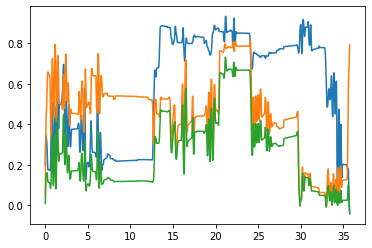

In [41]:
#x, y, x*y
t_list = []
x_list = []
y_list = []
xy_list = []
for i in range(len(trace)):
    x_list.append(trace[i]["x"])
    t_list.append(trace[i]["t"])
    y_list.append(trace[i]["y"])
    xy_list.append(trace[i]["x"]*trace[i]["y"])
    
t = t_list
x = x_list
y = y_list
xy = xy_list
fig = plt.figure()
# グラフの描画
plt.plot(t, x)
plt.plot(t, y)
plt.plot(t, xy)
plt.show()
fig.savefig('./result/x.png')

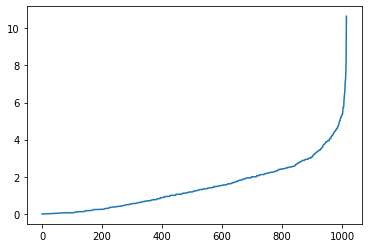

In [42]:
#速度
x_= 0
y_= 0
time_ = 0
v_list = []
for i in range(len(trace_list_list)):
    if(i != 0):
        x_ = round(abs(trace_list_list[i][0]-trace_list_list[i-1][0]), 3)
        y_ = round(abs(trace_list_list[i][1]-trace_list_list[i-1][1]), 3)
        time_ = round(trace_list_list[i][2]-trace_list_list[i-1][2], 3)
        c = round(np.sqrt(x_**2 + y_**2),3)
        v_list.append(c/time_)

v_list_ = sorted(v_list)



x = list(range(len(v_list_)))
y = v_list_
fig = plt.figure()
# グラフの描画
plt.plot(x, y)
plt.show()
fig.savefig('./result/v.png')

In [43]:
plus_zero = 12-len(str(data_1[0][1]))
file_name = str(data_1[0][1])
for i in range(plus_zero):
    file_name = "0" + file_name

In [44]:
file_name

'000000034139'

### ノーマル描画

In [48]:
flag = 1
end = 0
#時間外のところを除く
for i in range(len(trace_list_list)):
    if(trace_list_list[i][2] > caption_list_list[len(caption_list_list)-1][2]):
        print(i)
        end = i
        trace_list_list = trace_list_list[:end]
        break


import cv2
img=cv2.imread("/Users/sayako/MEGAsync/koba_ken/study/LaBERT-master/val2017/"+file_name+".jpg")
h, w, c = img.shape
size_x = w
size_y = h

for i in range(len(trace_list_list)-1):
    x = int(trace_list_list[i][0]*size_x)
    y = int(trace_list_list[i][1]*size_y)
    x_2 = int(trace_list_list[i+1][0]*size_x)
    y_2 = int(trace_list_list[i+1][1]*size_y)
    
    #速度で色分け
    if(v_list[i]>4):
        cv2.line(img, (x,y), (x_2,y_2), (0,0,0), thickness=2, lineType=cv2.LINE_AA)
    else:
        cv2.line(img, (x,y), (x_2,y_2), (0,255-v_list[i]*36,0), thickness=2, lineType=cv2.LINE_AA)
    pts = np.array(((335, 80), (375, 80), (375, 130)))
    
    
cv2.imwrite('./result/'+file_name+"_"+str(id_)+'.png', img)
#cv2.imwrite('./result/hello'+'.png', img)

True

### 時間指定で描画

In [85]:
flag = 1
end = 0
#時間外のところを除く
for i in range(len(trace_list_list)):
    if(trace_list_list[i][2] > caption_list_list[len(caption_list_list)-1][2]):
        print(i)
        end = i
        trace_list_list = trace_list_list[:end]
        break

import cv2
#img=cv2.imread("/Users/sayako/MEGAsync/koba_ken/study/LaBERT-master/val2017/"+file_name+".jpg")

img=cv2.imread("/Users/sayako/MEGAsync/koba_ken/study/LaBERT-master/data/COCO_val2017_000000034139/suitscase_BBOX/3/region_bbox_3.png")
h, w, c = img.shape
size_x = w
size_y = h

#+0.2

time_min = 29.7
time_max = 35.726

x_list_box = []
y_list_box = []

for i in range(len(trace_list_list)-1):
    # 秒数で区切る
    if(time_min < trace_list_list[i][2] < time_max):
        x = int(trace_list_list[i][0]*size_x)
        y = int(trace_list_list[i][1]*size_y)
        x_2 = int(trace_list_list[i+1][0]*size_x)
        y_2 = int(trace_list_list[i+1][1]*size_y)
    
    #速度で色分け
    if(v_list[i]>4):
        cv2.line(img, (x,y), (x_2,y_2), (0,0,0), thickness=2, lineType=cv2.LINE_AA)
    else:
        cv2.line(img, (x,y), (x_2,y_2), (0,255-v_list[i]*36,0), thickness=2, lineType=cv2.LINE_AA)
        x_list_box.append(x)
        x_list_box.append(x_2)
        y_list_box.append(y)
        y_list_box.append(y_2)
    pts = np.array(((335, 80), (375, 80), (375, 130)))
    
    
cv2.imwrite('./result/'+file_name+"_"+str(id_)+"_"+str(time_min)+"~"+str(time_max)+'.png', img)
#cv2.imwrite('./result/hello'+'.png', img)

True

In [78]:
print("x_min=",min(x_list_box),"x_max=",max(x_list_box),"y_min=",min(y_list_box),"y_max=",max(y_list_box))

x_min= 82 x_max= 445 y_min= 135 y_max= 380


In [97]:
#時間外のところを除く
for i in range(len(trace_list_list)):
    if(trace_list_list[i][2] > caption_list_list[len(caption_list_list)-1][2]):
        print(i)
        end = i
        trace_list_list = trace_list_list[:end]
        break




import cv2
img =cv2.imread("./image_out/"+file_name+".jpg")
h, w, c = img.shape

size_x = w
size_y = h

x_max = 0
y_max = 0
x_min = w
y_min = h

num_min = 30
num_max = 0

second = 0
before = 0
flag = 0


for i in range(len(region_bbox_image)):
    cv2.rectangle(img, (region_bbox_image[i][0], region_bbox_image[i][1]), (region_bbox_image[i][2], region_bbox_image[i][3]), (0, 0, 255), thickness=1)


    
for i in range(len(trace_list_list)-1):
    
    x = int(trace_list_list[i][0]*size_x)
    y = int(trace_list_list[i][1]*size_y)
    x_2 = int(trace_list_list[i+1][0]*size_x)
    y_2 = int(trace_list_list[i+1][1]*size_y)
    
    
    #if((v_list[i]>4)and( trace_list_list[i][2] < num_max)):
    if((v_list[i]>6)and( num_min < trace_list_list[i][2])):
    #if((v_list[i]>4)and( num_min <trace_list_list[i][2] < num_max)):
        cv2.line(img, (x,y), (x_2,y_2), (255,255,255), thickness=2, lineType=cv2.LINE_AA)
        
    if(v_list[i]>4):
       pass
        
    #elif( trace_list_list[i][2] < num_max):
    elif( num_min < trace_list_list[i][2]):
    #elif( num_min <trace_list_list[i][2] < num_max):
    
    
        if(x_max < trace_list_list[i][0]):
            x_max = trace_list_list[i][0]
        if(y_max < trace_list_list[i][1]):
            y_max = trace_list_list[i][1]
        if(x_min > trace_list_list[i][0]):
            x_min = trace_list_list[i][0]
        if(y_min > trace_list_list[i][1]):
            y_min = trace_list_list[i][1]
        
        if(flag == 0):
            flag = 1
        else:
            second = second + trace_list_list[i][2] - before
        before = trace_list_list[i][2] 
        cv2.line(img, (x,y), (x_2,y_2), (0,255-v_list[i]*36,0), thickness=2, lineType=cv2.LINE_AA)
    
print(second)
print("min")
print("x: ",x_min*w,"y: ", y_min*h)
print("max")
print("x: ",x_max*w,"y: ", y_max*h)




cv2.rectangle(img, (int(x_min*w), int(y_min*h)), (int(x_max*w), int(y_max*h)), (255, 0, 0), thickness=8)
cv2.imwrite('./image_out/'+file_name+"_"+name_id+"_"+str(num_min)+ "~"+str(num_max)+'.png', img)

AttributeError: 'NoneType' object has no attribute 'shape'